Exploring the $\chi^2$ distribution
===

Start with some model to generate random data.  <br> 
We'll use $0.2+\frac{sin(x)}{x+1}$ over the range $0\leq x<15$ <br>
Generate $N$ random numbers according to this distribution and make a histogram of the results using 30 bins. 

An easy way to generate random numbers according to an arbitrary distribution is to use rejection sampling (here's a great [decription  of the technique](https://matthewfeickert.github.io/Statistics-Notes/notebooks/simulation/Rejection-Sampling-MC.html) )

1) Make a histogram of your random distribution.  Verify that the the numbers you generated agree with the shape of the function.  Generate at least 10000 points and plot your data in a histogram with errorbars.  You can use numpy+matplotlib+etc, PyROOT, or a mix.  Think about how to appropriately normalize your function, then overlay it with the data.  The normalization depends on the number of bins, the bin range and the number of points thrown.  You may find it easier to first nromalize the area of your function to 1.0, thus turning it into a proper PDF.  

Number of samples: 10000
Mean: 6.445547076514174
Std Dev: 4.8013595645147555


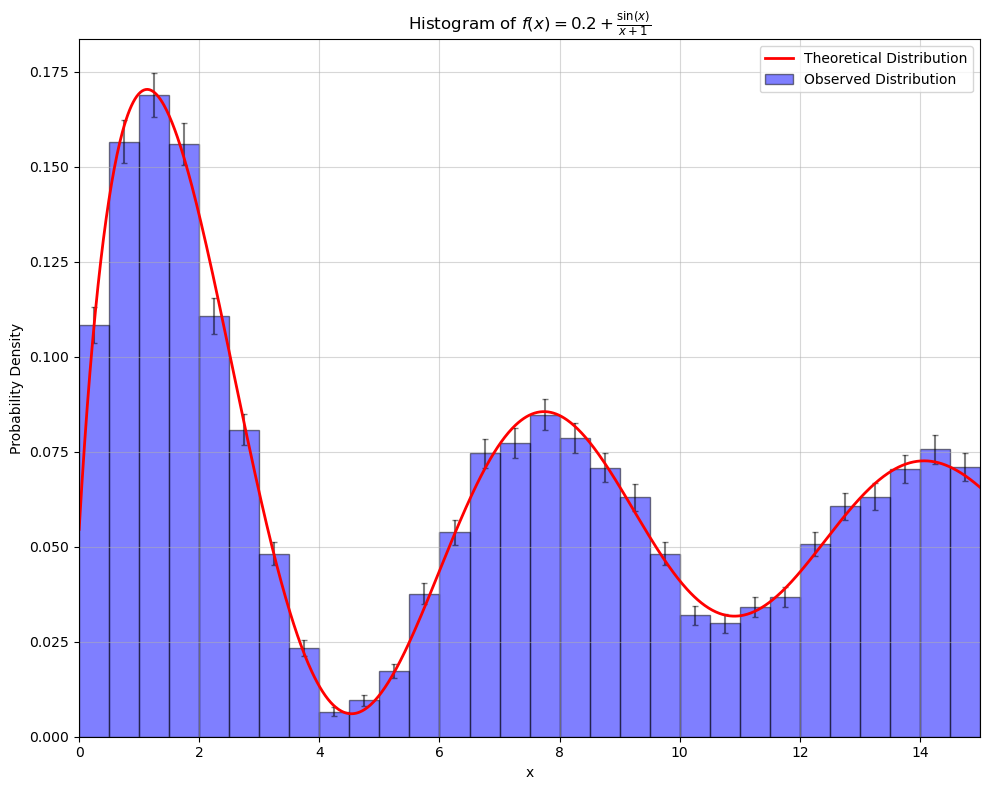

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


def pdf(x):
    return 0.2 + np.sin(x) / (x + 1)


def rejection_sampling(n_samples=10000):
    samples = []
    x_min, x_max = 0, 15
    x_range = np.linspace(x_min, x_max, 10000)
    M = np.max(pdf(x_range))
    while len(samples) < n_samples:
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(0, M)
        if y <= pdf(x):
            samples.append(x)
    return np.array(samples)


normalization_constant = integrate.quad(pdf, 0, 15)[0]
n_samples = 10000
samples = rejection_sampling(n_samples)
mean = np.mean(samples)
std = np.std(samples)
print("Number of samples:", n_samples)
print("Mean:", mean)
print("Std Dev:", std)

n_bins = 30
counts, bin_edges = np.histogram(samples, bins=n_bins, range=(0, 15))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]
hist_density = counts / (n_samples * bin_width)
errors = np.sqrt(counts) / (n_samples * bin_width)
x_theory = np.linspace(0, 15, 1000)
y_theory = pdf(x_theory) / normalization_constant

plt.figure(figsize=(10, 8))
plt.bar(bin_centers, hist_density, width=bin_width, color="blue", alpha=0.5, edgecolor="black",
        label="Observed Distribution")
plt.errorbar(bin_centers, hist_density, yerr=errors, ecolor="black", capsize=2, alpha=0.5, linestyle="none")
plt.plot(x_theory, y_theory, "r-", linewidth=2, label="Theoretical Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title(r"Histogram of $f(x) = 0.2 + \frac{\sin(x)}{x+1}$")
plt.legend()
plt.grid(True, alpha=0.5)
plt.xlim(0, 15)
plt.tight_layout()
plt.show()


2) Repeat the above experiment at least 1000 times.  For each experiment calculate the $\chi^2$ of your data with respect to your (properly normalized) model.  Plot (histogram) the $\chi^2$ distribution and compare it to the functional form of the $\chi^2(ndof=30)$ distribution.  You can find the form of the $\chi^2(ndof)$ PDF function in many places and implement it using the Gamma function or use a premade function, eg:
* [wikipedia](https://en.wikipedia.org/wiki/Chi-squared_distribution)
* [scipy.stats.chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)

Mean: 30.228833008577585  expected: 30
Std Dev: 8.18581269838833  expected: 7.745966692414834


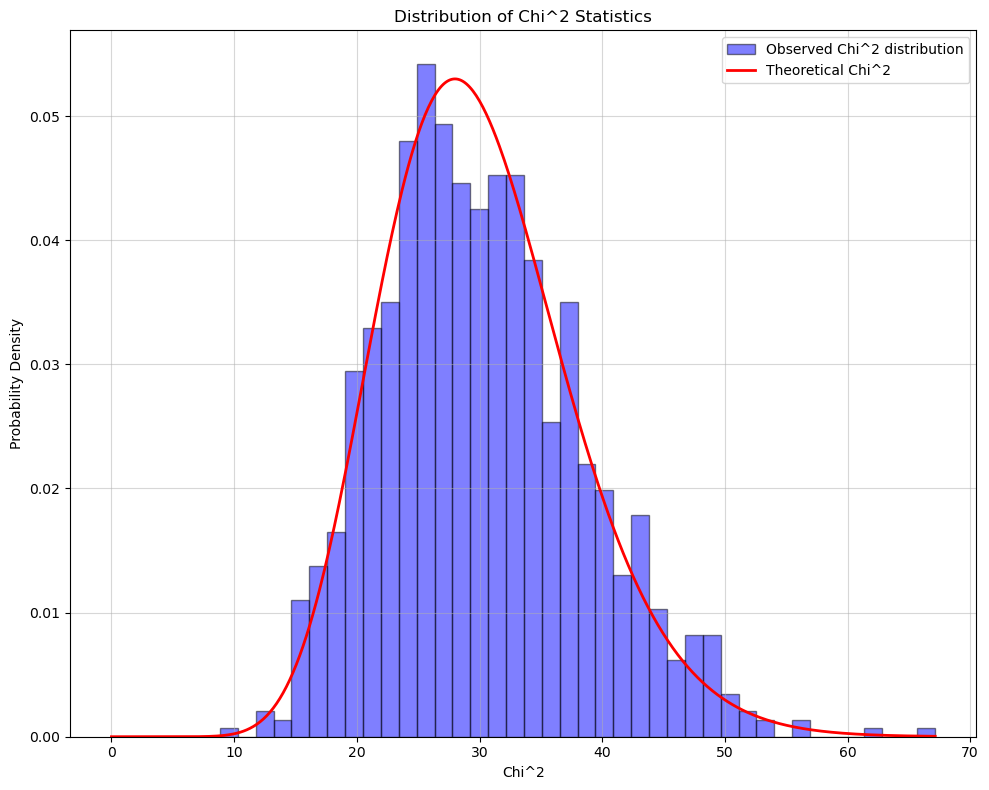

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


def chi_square(samples, n_bins=30):
    counts, bin_edges = np.histogram(samples, bins=n_bins, range=(0, 15))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = bin_edges[1] - bin_edges[0]
    expected_density = pdf(bin_centers) / normalization_constant
    expected_counts = expected_density * len(samples) * bin_width
    mask = expected_counts > 0
    chi2_stat = np.sum((counts[mask] - expected_counts[mask]) ** 2 / expected_counts[mask])
    return chi2_stat


n_samples = 10000
n_bins = 30
n_experiments = 1000
chi_squared_values = []
for i in range(n_experiments):
    samples = rejection_sampling(n_samples)
    chi2_stat = chi_square(samples, n_bins=n_bins)
    chi_squared_values.append(chi2_stat)

chi_squared_values = np.array(chi_squared_values)
mean_chi2 = np.mean(chi_squared_values)
std_chi2 = np.std(chi_squared_values)
print("Mean:", mean_chi2, " expected:", n_bins)
print("Std Dev:", std_chi2, " expected:", np.sqrt(2 * n_bins))

plt.figure(figsize=(10, 8))
plt.hist(chi_squared_values, bins=40, density=True, alpha=0.5, color="blue", edgecolor="black",label="Observed Chi^2 distribution")
ndof = n_bins
x_chi2 = np.linspace(0, max(chi_squared_values), 500)
y_chi2_theory = chi2.pdf(x_chi2, ndof)

plt.plot(x_chi2, y_chi2_theory, "r-", linewidth=2, label="Theoretical Chi^2")
plt.xlabel("Chi^2")
plt.ylabel("Probability Density")
plt.title("Distribution of Chi^2 Statistics")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

**Only required for Phys5630**

3) Modify your code above to perform the following study. <br>
Repeat (2) for nbins = $ndof = 30, 50, 75, 100$ and calculate the reduced $\chi^2$, eg $\chi^2/ndof$ for each experiment.  Plot the mean value of the reduced $\chi^2$ with errorbars versus $ndof$.  Make a table comparing your calculations to the expected results.

In [3]:
# your work goes here